Notebook to visualize the output of the GP ESG regression

In [1]:
import pickle 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Define functions

In [2]:
def plot_fit(gp, X_obs, y_obs, ax):
    X = np.linspace(X_obs[0], X_obs[-1], 500)
    mean_prediction, std_prediction = gp.predict(X, return_std=True)

    #plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
    ax.scatter(X_obs, y_obs, label="Observations")
    ax.plot(X, mean_prediction, label="Mean prediction")
    ax.fill_between(
        X.ravel(),
        mean_prediction - 1.96 * std_prediction,
        mean_prediction + 1.96 * std_prediction,
        alpha=0.5,
        label=r"95% confidence interval",
    )
    ax.legend()
    ax.set_xlabel("$x$")
    ax.set_ylabel("$f(x)$")
    ax.set_title(f"{y_obs.name} {gp.kernel_}")

def plot_fit_wrapper(k:str, esg_refined,esg_gp_models, ax):
    obs_index = esg_refined['index'][k]  # vector of bools containing where observation happened
    y = esg_refined['data'][k]
    y_obs = y[obs_index]
    X = np.array(range(len(y)))

    X_obs = np.expand_dims(X[obs_index], axis = 1)
    plot_fit(esg_gp_models[k]['gp'], X_obs, y_obs, ax)


def plot_fit_wrapper_stock(k:str, esg_refined, esg_gp_models, ax):

    y = esg_refined[k]
    y_obs = y[np.isfinite(y)]
    X = np.array(range(len(y)))

    X_obs = np.expand_dims(X[np.isfinite(y)], axis = 1)
    plot_fit(esg_gp_models[k]['gp'], X_obs, y_obs, ax)

# Stock GP

In [3]:
esg_gp_models_ind_stocks = pd.read_pickle('../data/tidy/gp_esg_stock.pkl')
# convert list of dicts to one dict
esg_gp_models_ind_stocks = {list(esg_gp_models_ind_stocks[i].keys())[0]:esg_gp_models_ind_stocks[i][list(esg_gp_models_ind_stocks[i].keys())[0]] for i in range(len(esg_gp_models_ind_stocks))}

C:\Users\User\AppData\Local\Temp\ipykernel_38652\1336267379.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1,3,figsize = (20,5))


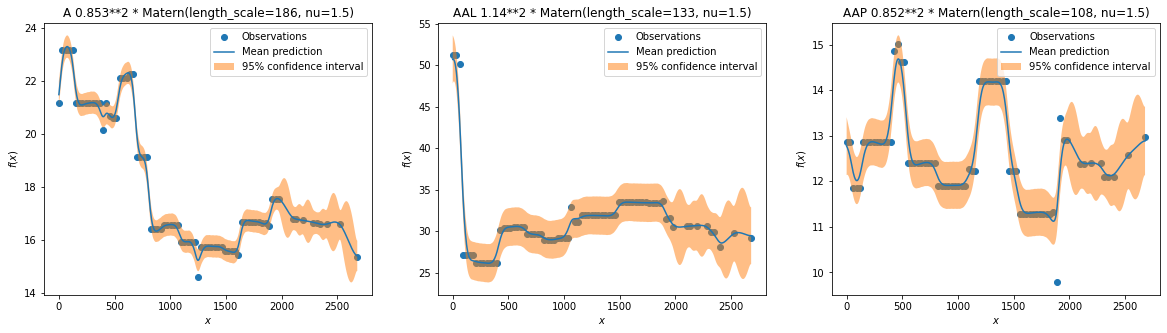

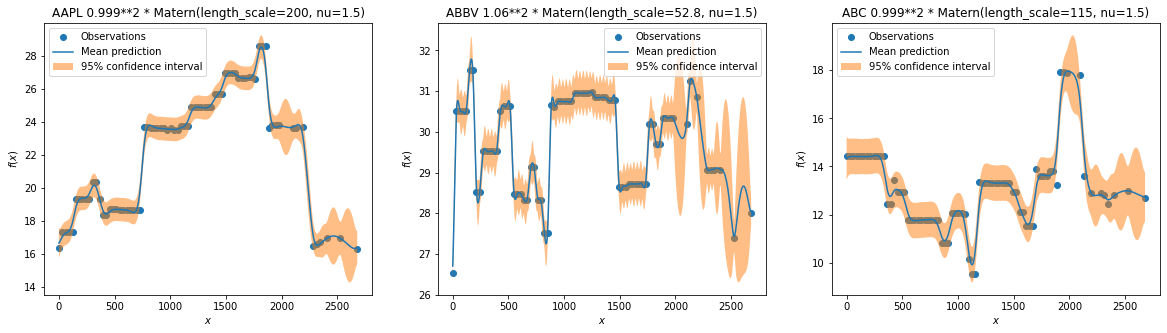

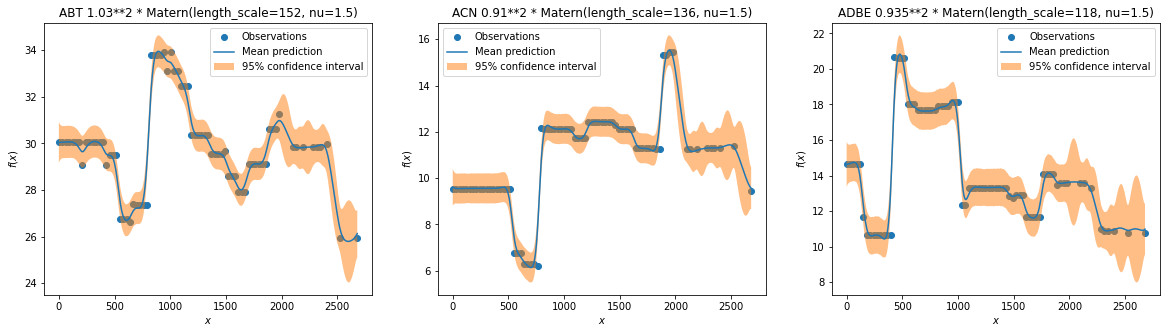

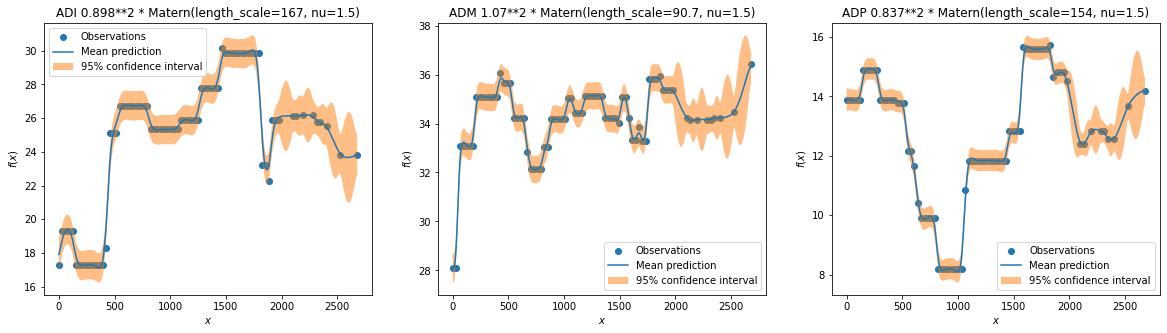

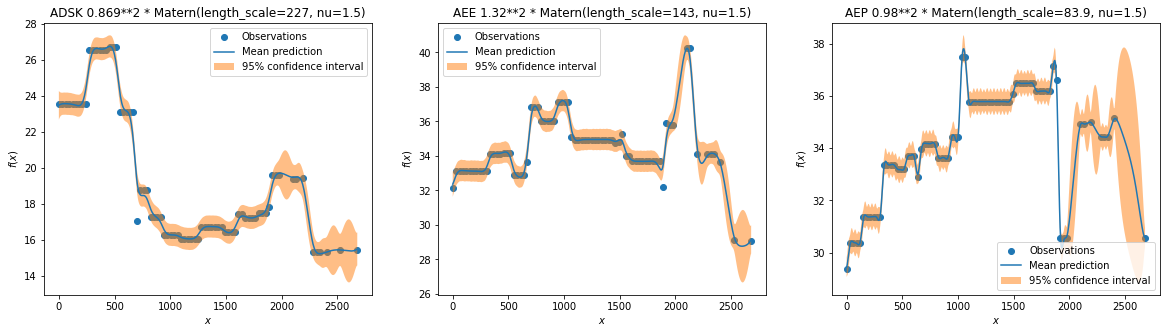

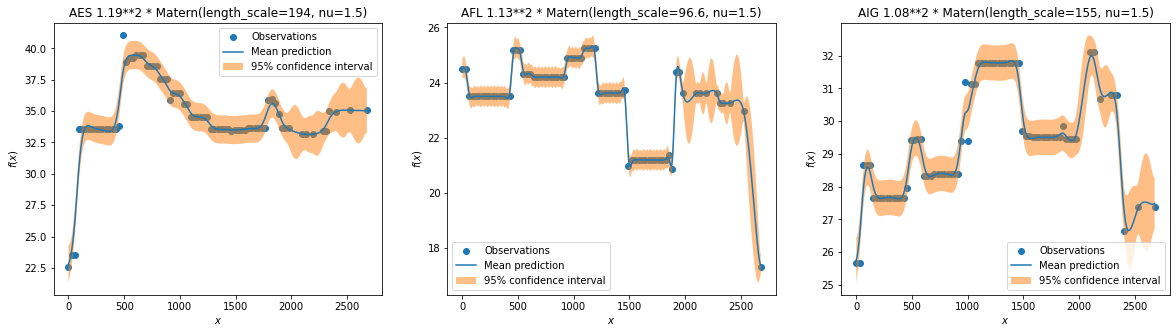

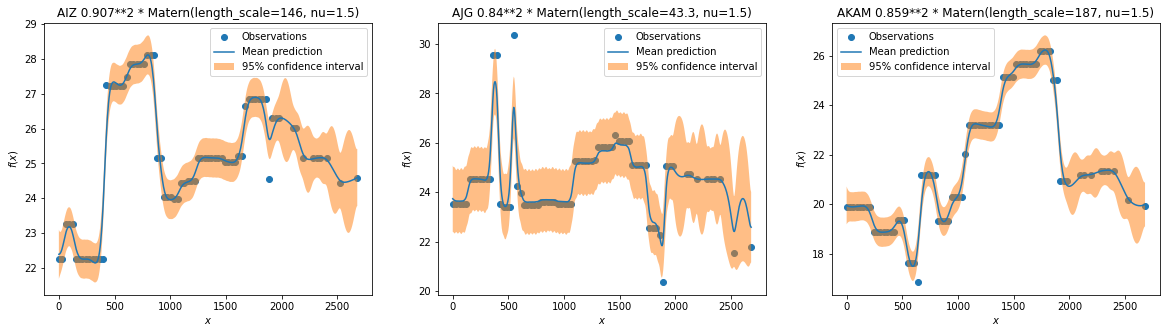

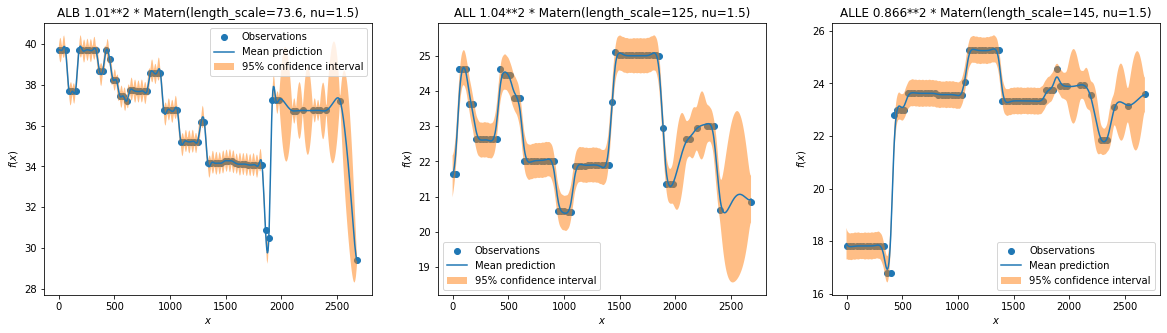

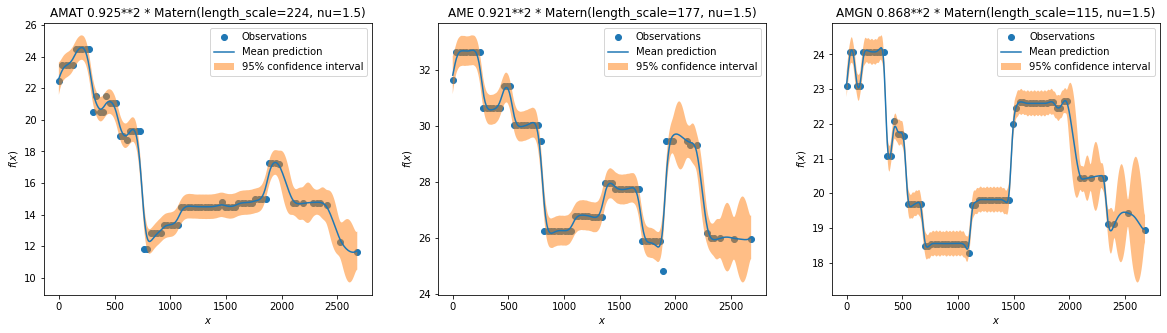

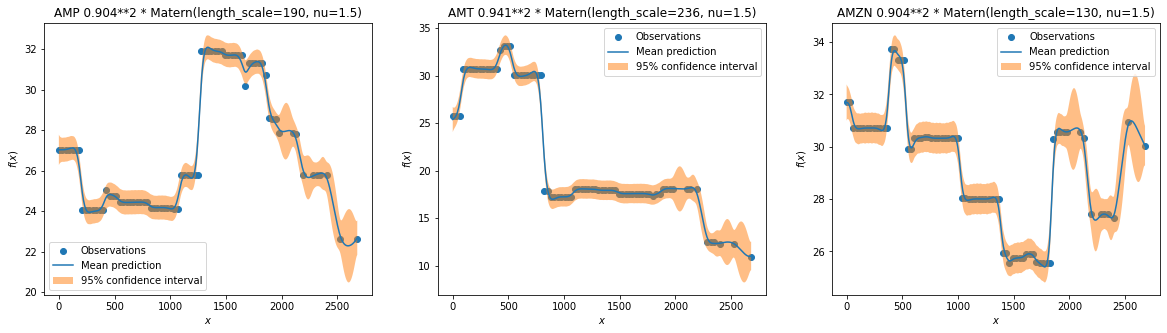

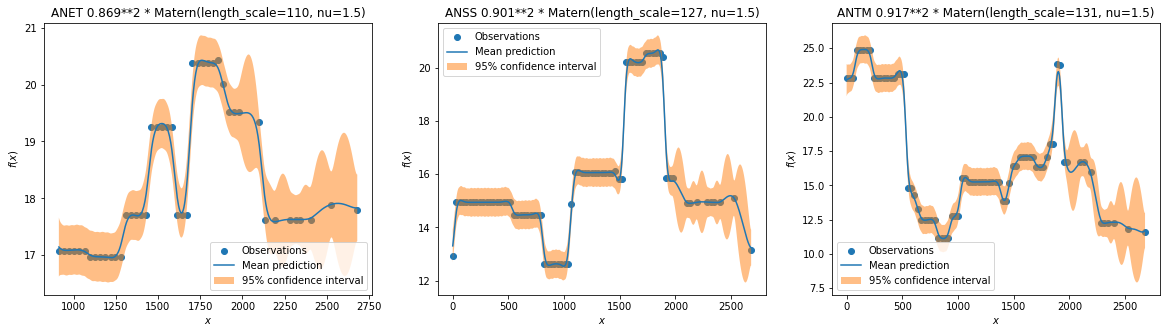

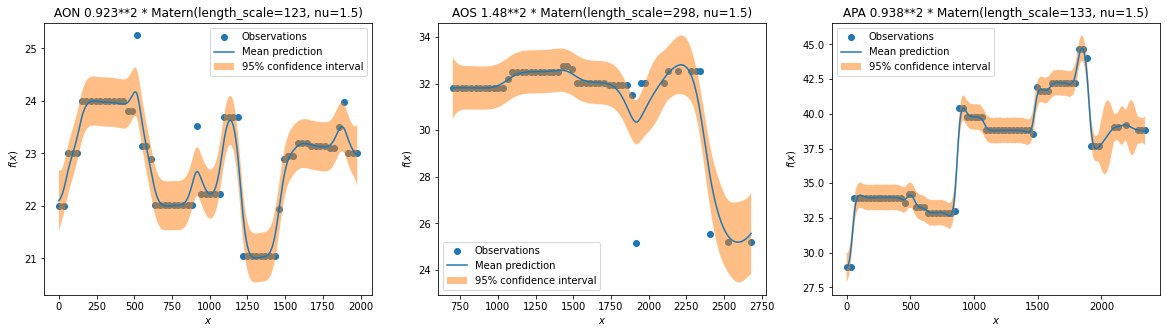

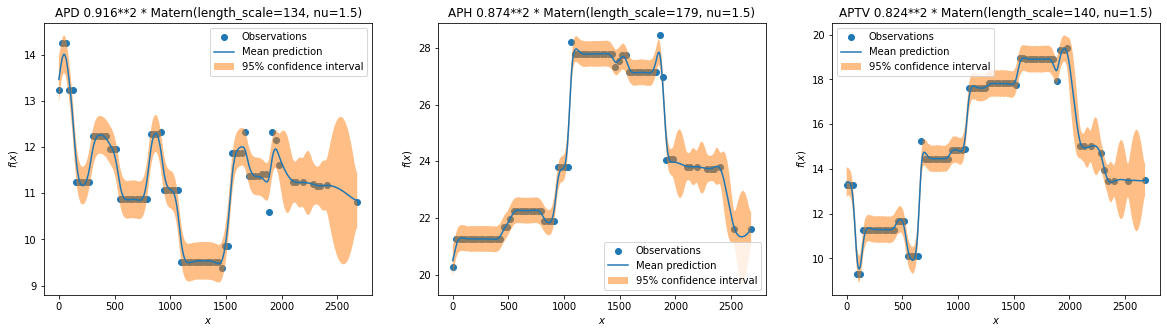

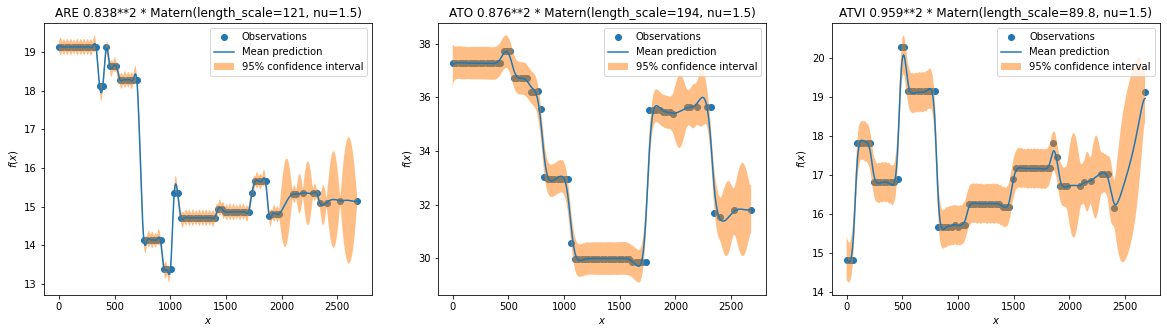

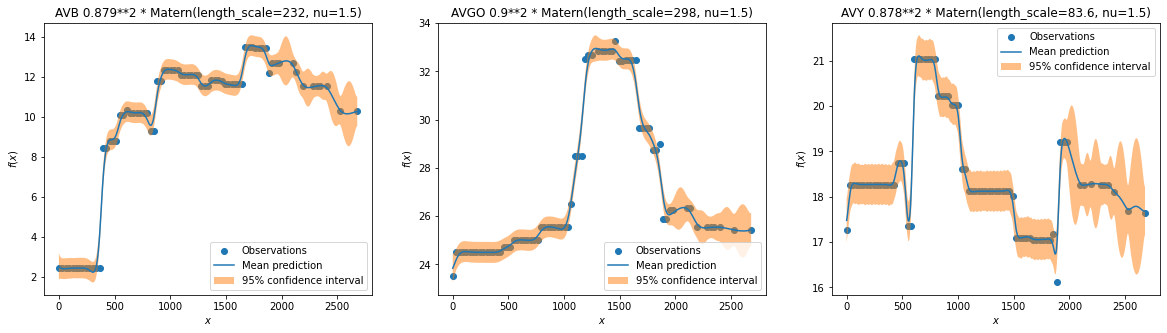

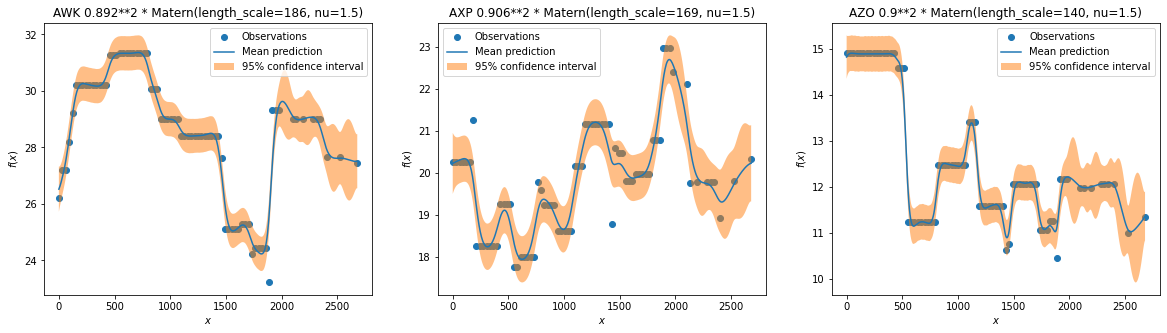

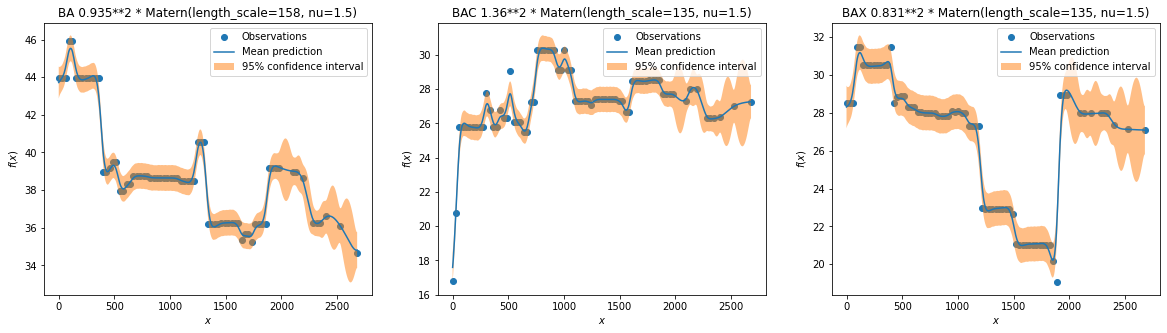

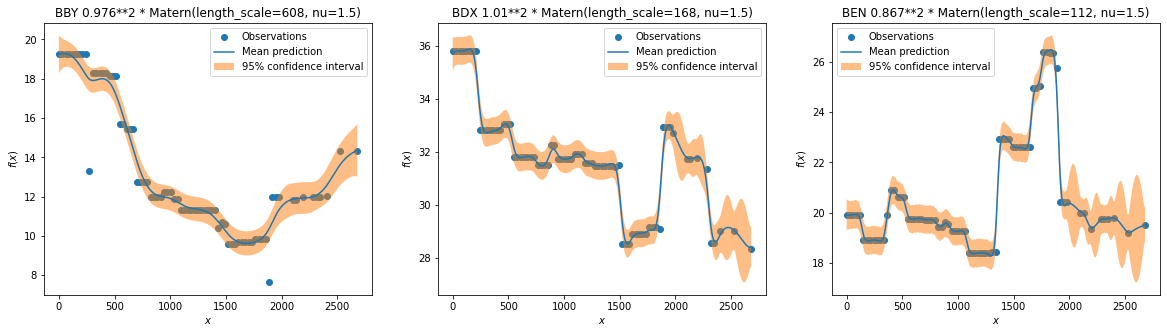

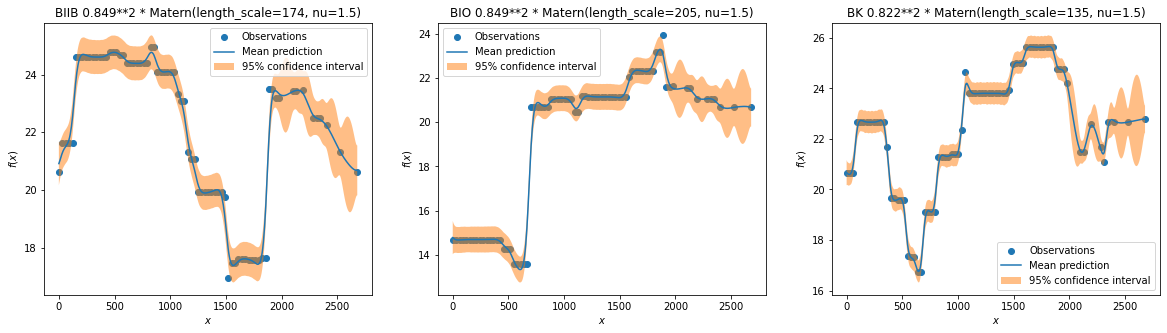

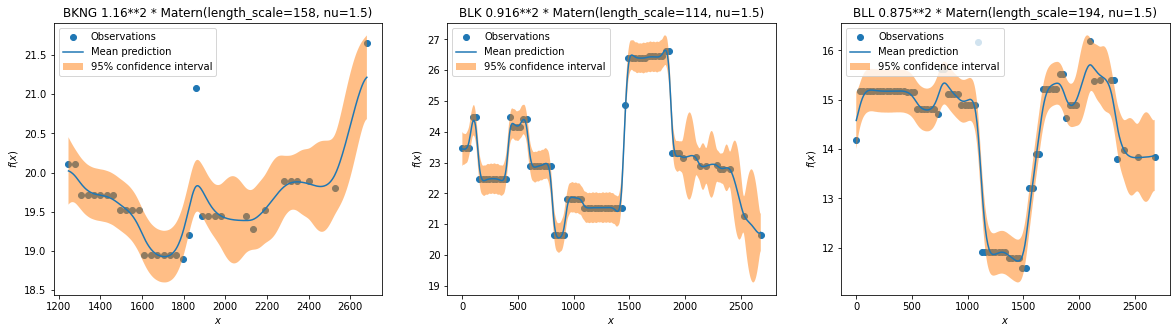

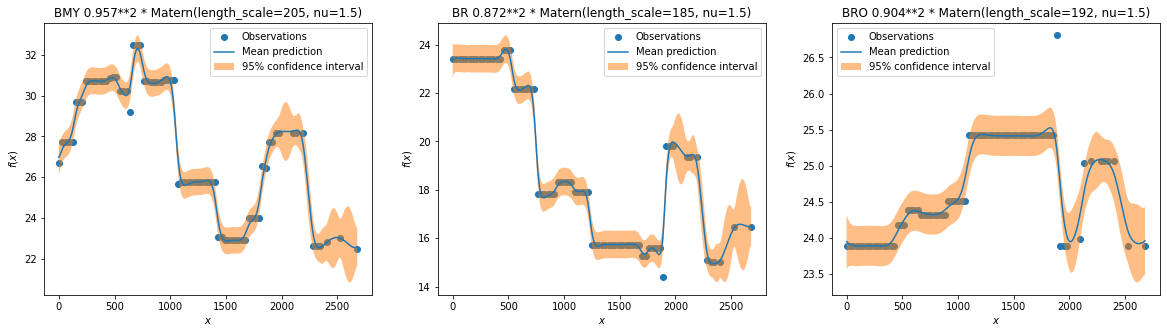

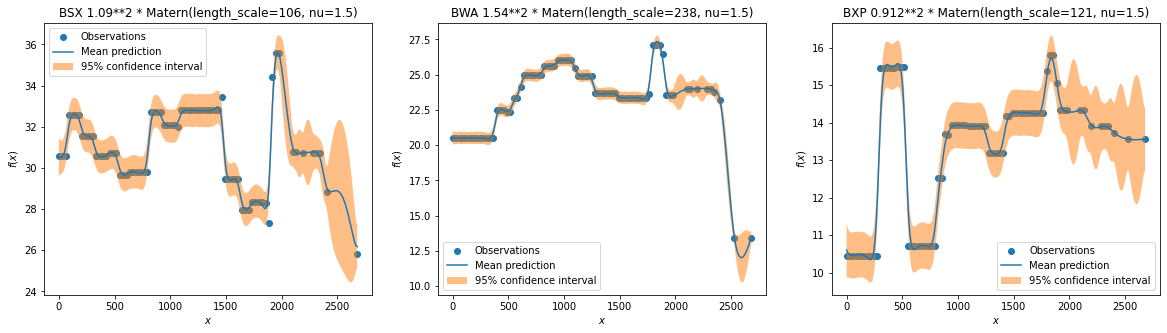

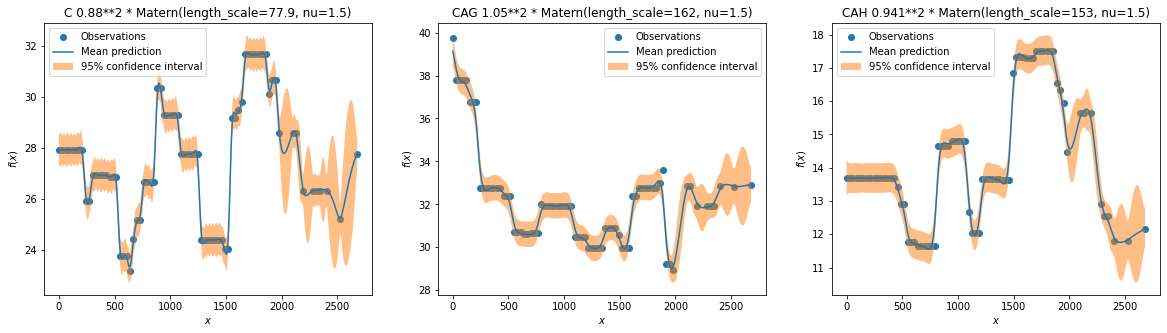

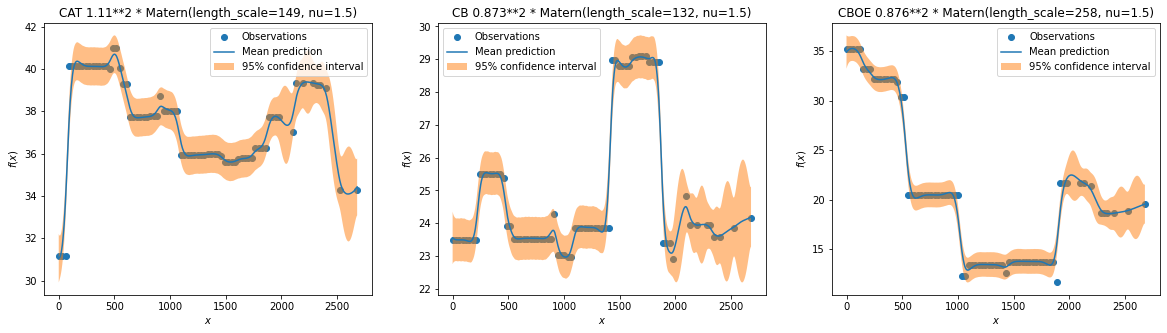

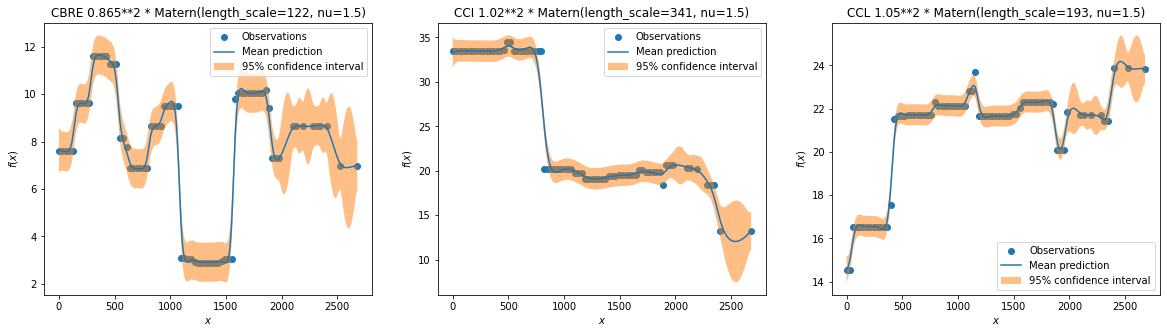

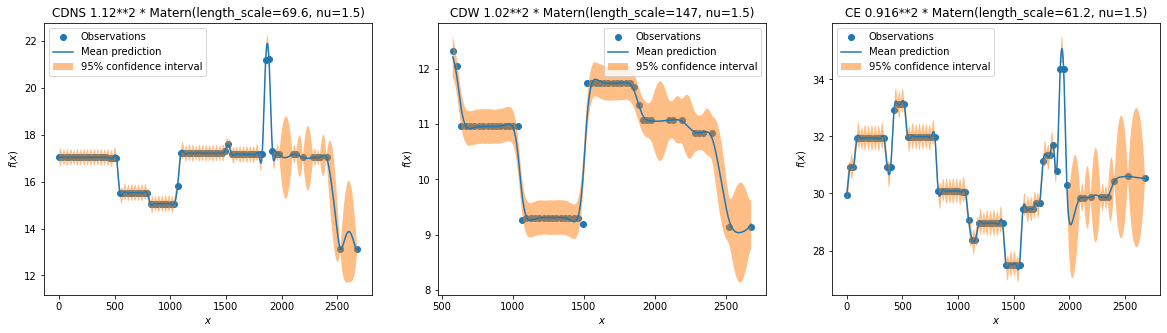

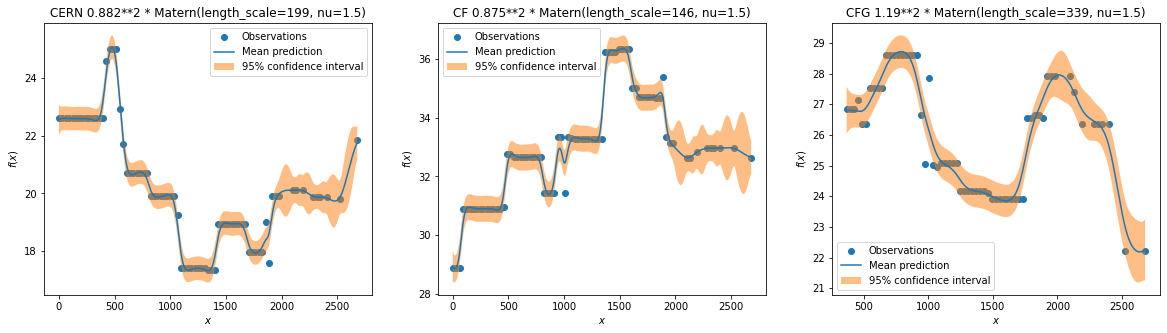

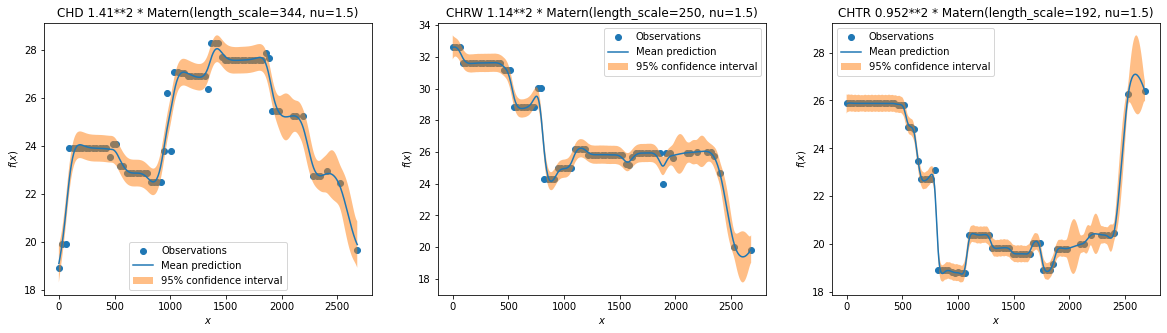

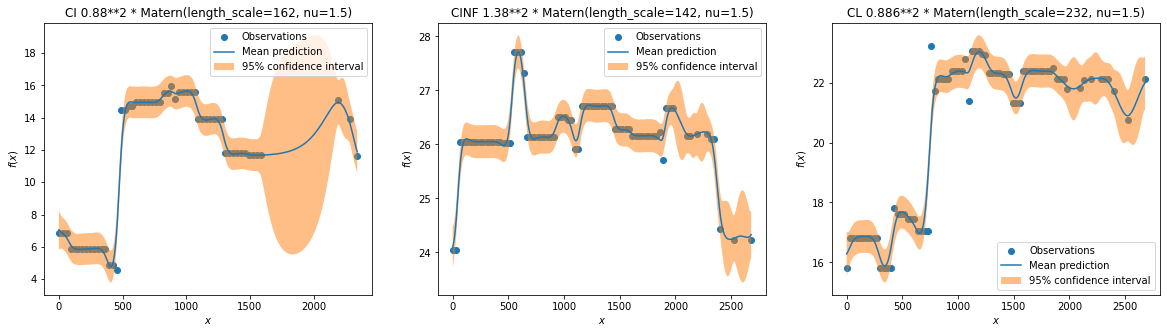

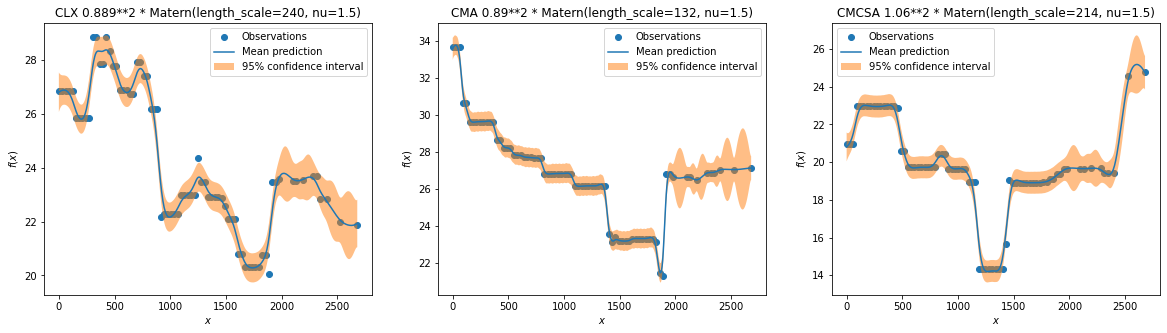

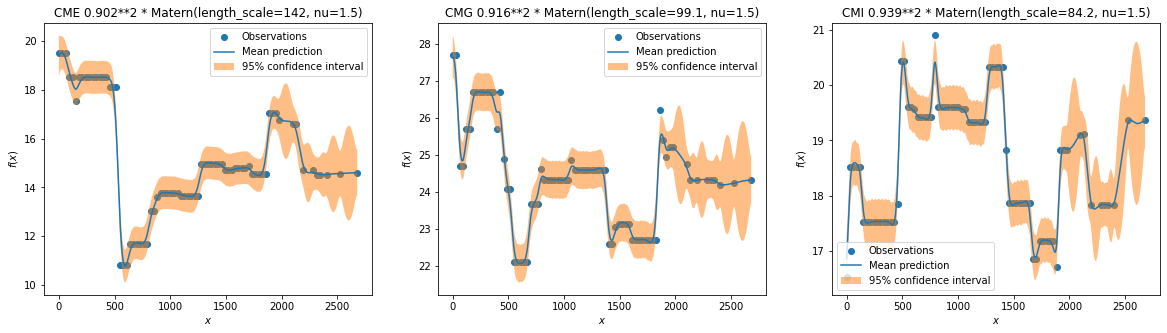

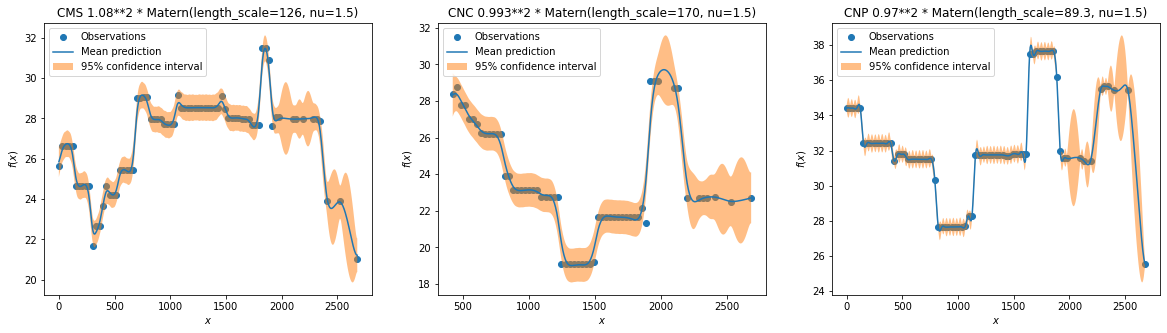

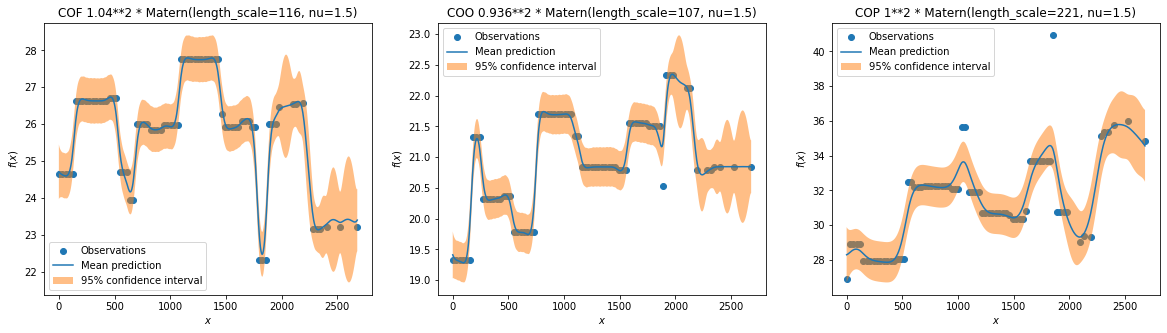

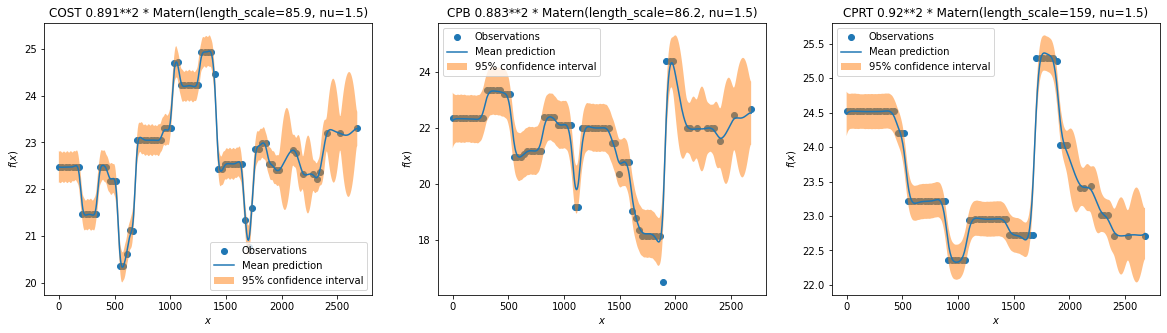

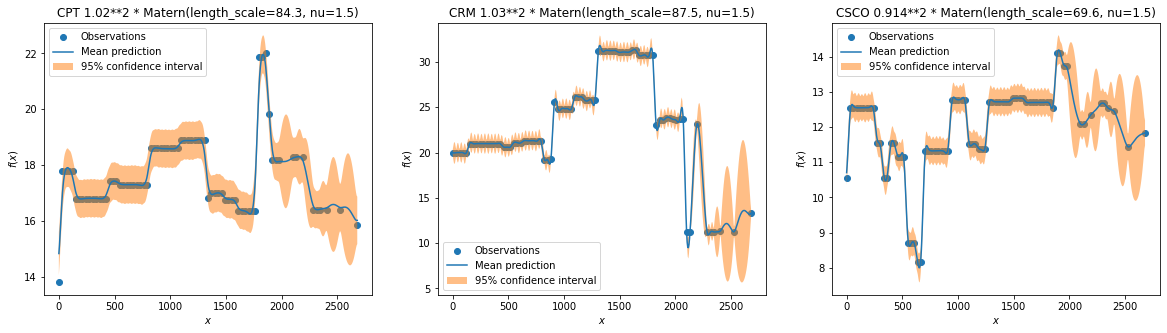

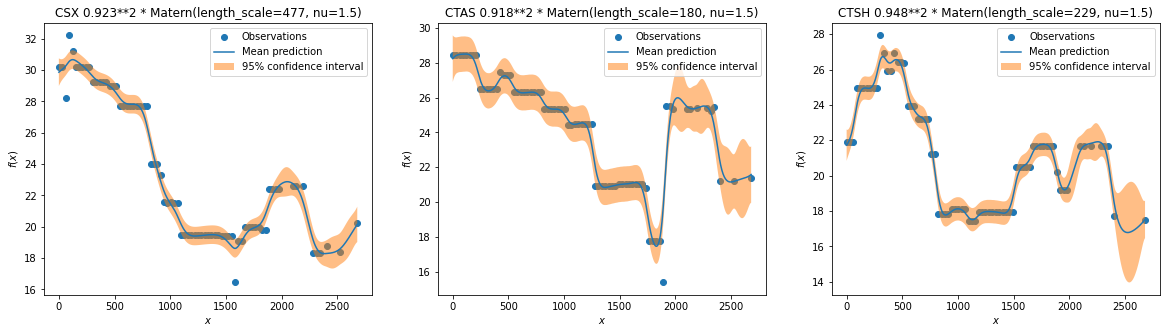

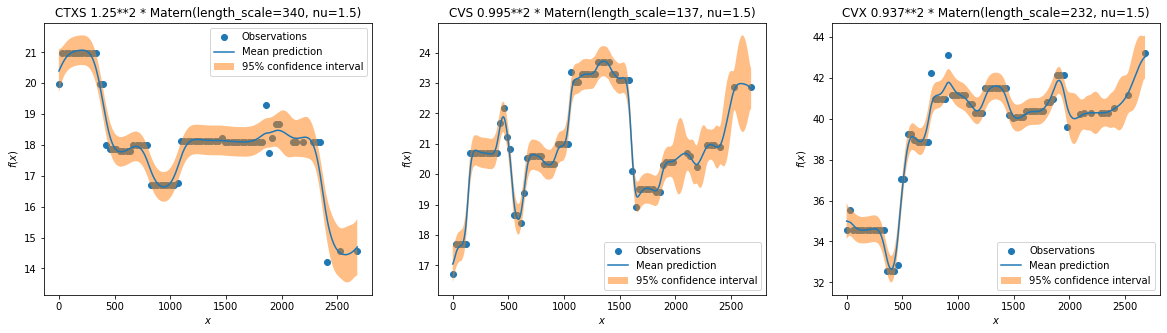

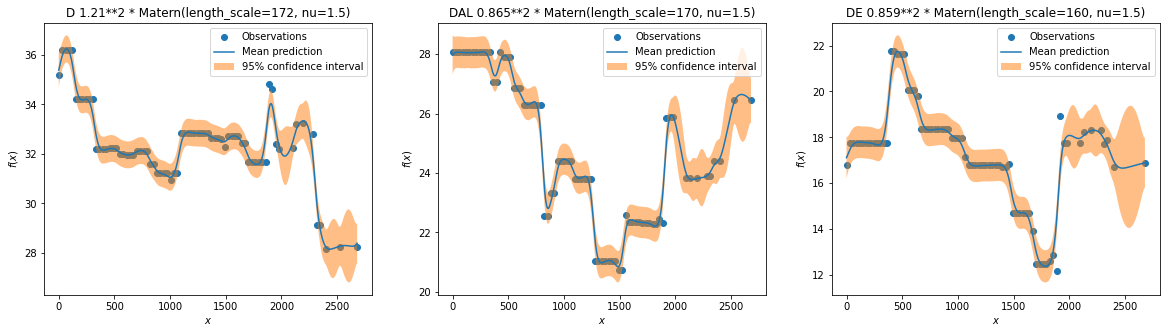

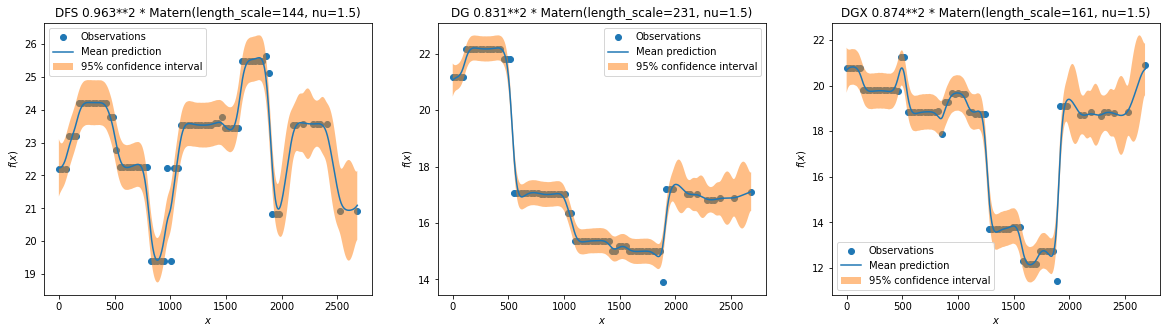

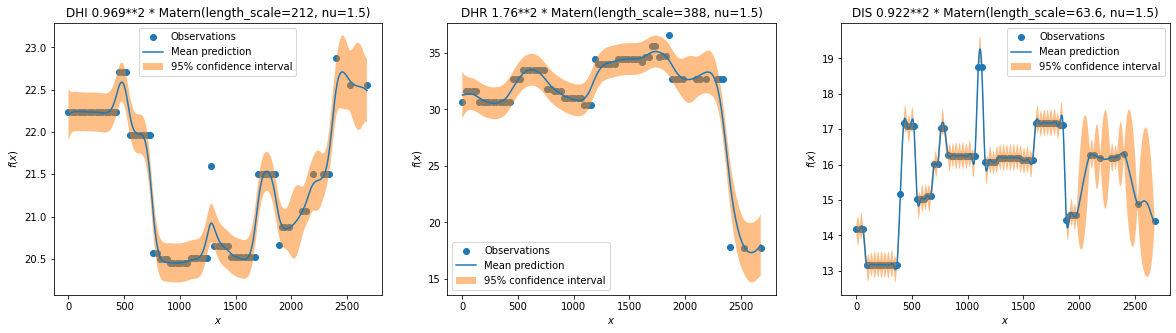

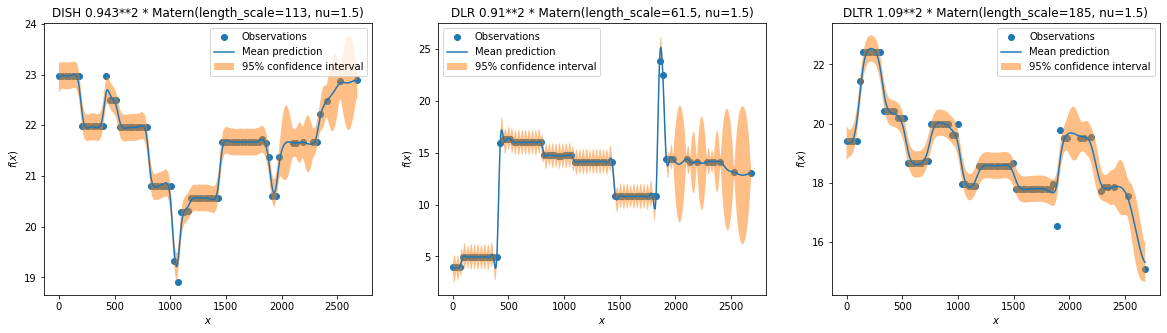

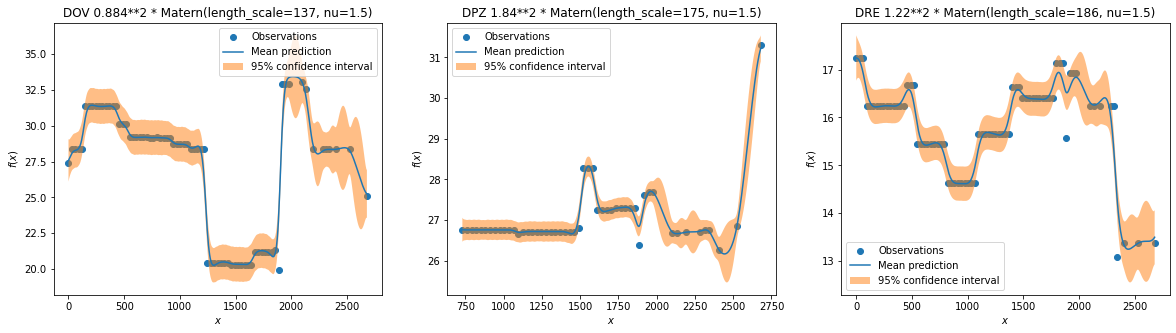

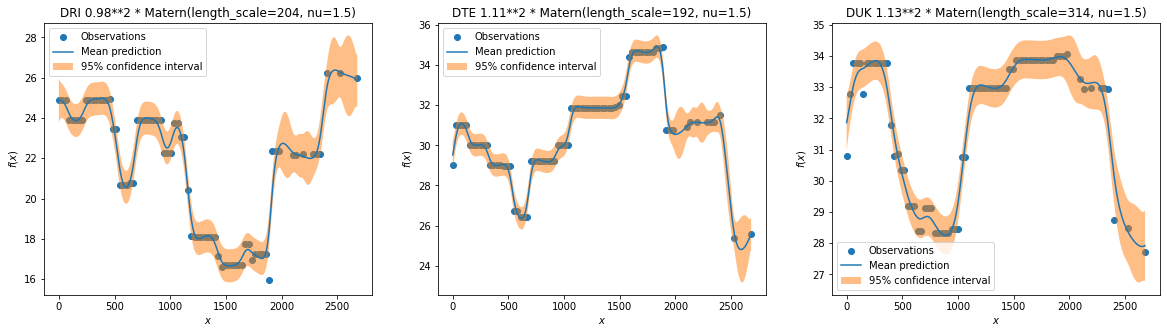

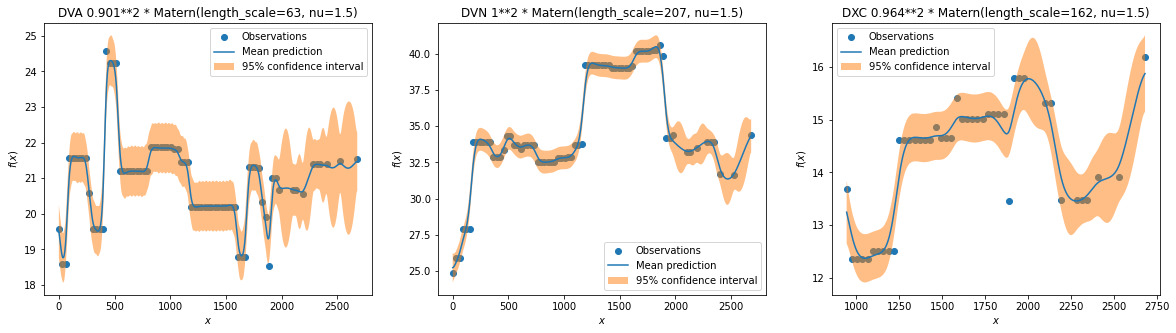

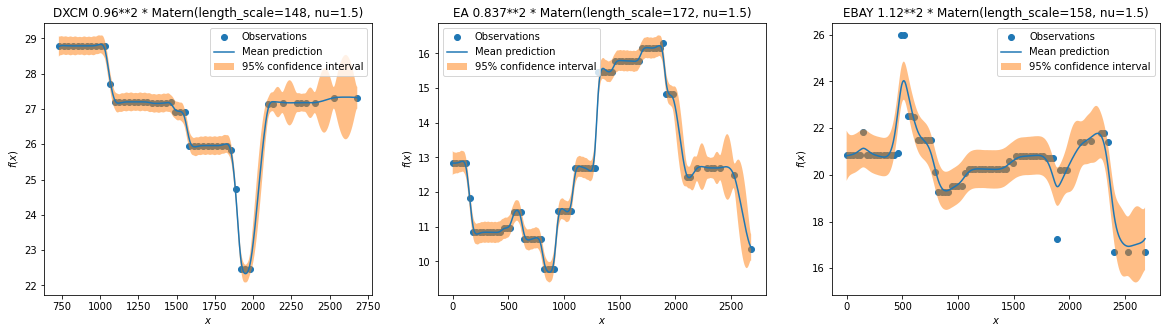

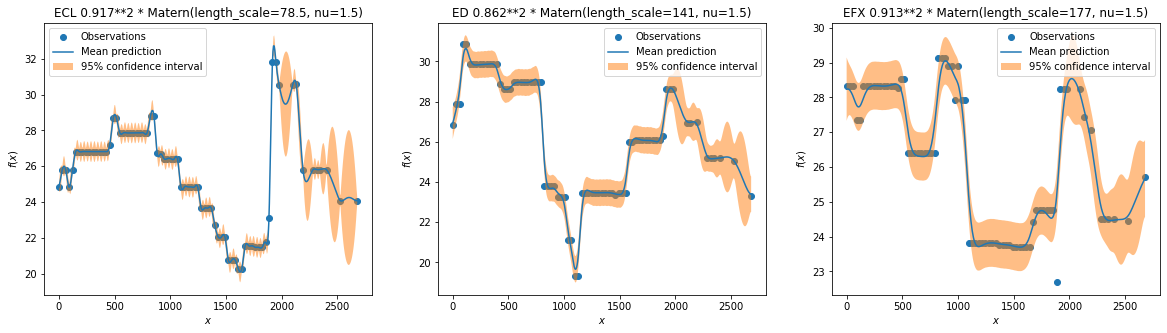

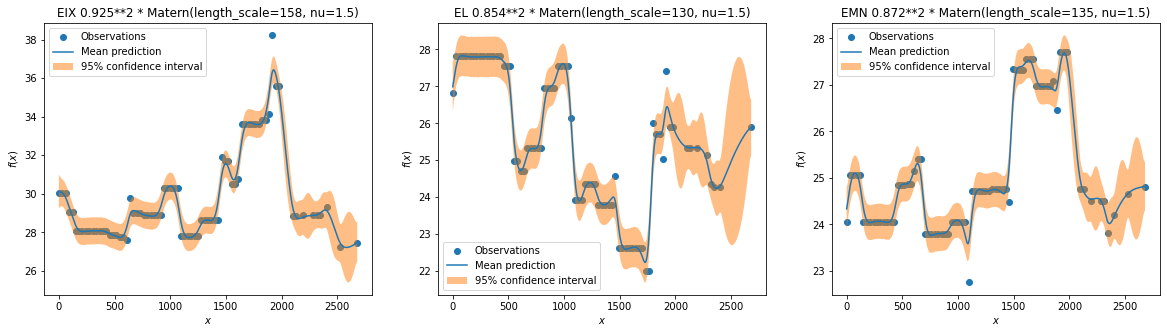

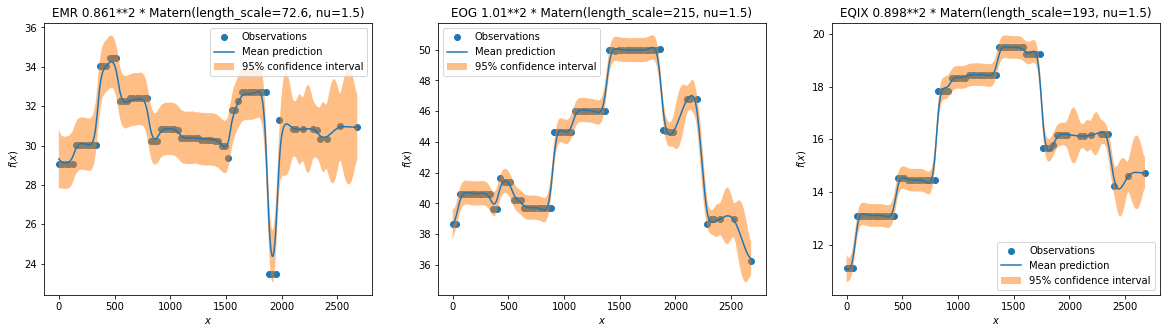

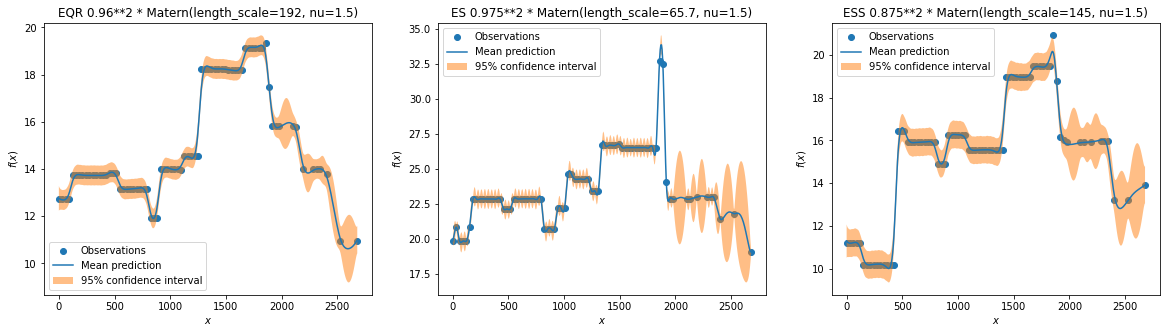

In [4]:
esg_stock_refined= pd.read_pickle('../data/tidy/esg_refined_no_diff.pkl')
stock_names = list(esg_stock_refined.columns)
for i in range(int(np.ceil(len(stock_names)/3))):
    if i%3 == 0:
        fig, ax = plt.subplots(1,3,figsize = (20,5))
    plot_fit_wrapper_stock(stock_names[i], esg_stock_refined, esg_gp_models_ind_stocks, ax = ax[i%3])  